## Финальный проект ##
___
Мы изучали 2 больших раздела науки machine learning, где мы разбирались с линейными алгоритмами и deep learning, где мы обучали нейронные сети для классификации изображений

**Возможные варианты проектов**


1.   Использование линейных моделей для обработки больших данных
2.   Использование нейросетей для задачи классификации

Задание, как обычно, творческое, я хочу, чтобы вы провели эксперименты и представили их в качестве проекта. Можно оформить проект в PowerPoint, можно в виде ноутбука jupiter notebook. Набор данных предлагаю взять на платформе [Kaggle](https://www.kaggle.com)
Общие требования к проекту (вне зависимости от области ML или DL задачу вы выбрали):

1. Расписать цель. Почему именно эту задачу вы выбрали? Почему, на ваш взгляд, задача является актуальной, важной, может быть, *важной для вас*?
2. Обязательно обработать данные. В случае с ML это может быть: обработка пропусков данных, удаление лишних данных и т.п. В случае DL и классификации изображений - использование аугментации. 
3. Провести несколько экспериметнтов! Вам необходимо протестировать несколько моделей и для каждой привести графики (точности и функции потерь). Если есть возможность построить график - стройте!
4. Подсчитать метрики. ML смотря какую задачу вы выберите, но для задачи классификации обязательно построить confusion matrix (смотрите предыдущие занятия). Уметь читать и объяснять метрики.



### Проект в ML ###


Для выполнения проекта вам, с вероятностью 99% понадобится библиотека [Pandas](https://pandas.pydata.org). Мы ее не использовали, чтобы ознакомиться с ее возможностями советую посмотреть [примеры](https://www.kaggle.com/code/icarofreire/pandas-24-useful-exercises-with-solutions). Больше примеров можете найти там же. 

Пример выполнения можете найти [здесь](https://www.kaggle.com/code/faressayah/data-science-best-practices-using-pandas-titanic) и [здесь](https://www.kaggle.com/code/nileshrathi99/predicting-university-ranking)

### Проект в DL ###
Полузные ссылки:
* Об [аугментации](https://pytorch.org/vision/stable/transforms.html) 
* Для работы с изображениями используйте библиотеку [Pillow](https://pillow.readthedocs.io/en/latest/handbook/tutorial.html)
* Советую выполнять задачу сразу в [Kaggle](https://www.kaggle.com), он предоставляет больше бесплатных ресурсов.

#### Аугментация ####
Пример ниже предлагает вариант как можно внедрить аугментацию в ваш код. Можно не использовать все аугментации, которые приведены. **Убедитесь, что параметры для нормализации для всех аугментаций совпадают**

Перед тем как применять аугментацию откройте изображение! Посмотрите какого оно размера, в каком оно формате!

In [ ]:
class your_dataset:
    def __init__(self, ... , datatype:str = 'train'):
        ...
        self.datatype = type_
        self.augm = self.get_augm()
    
    def get_augm(self,):
        if self.datatype == 'train':
            return transforms.Compose([transforms.CenterCrop(size = 400),
                                      transforms.Resize((256, 256)), 
                                      transforms.RandomPerspective(),
                                      transforms.RandomRotation(10),
                                      transforms.RandomVerticalFlip(),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomGrayscale(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
        elif self.datatype == 'val':
            return transforms.Compose(...)
        elif self.datatype == 'test':
            return  transforms.Compose([transforms.Resize((256,256)),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

    def __getitem__(self, key)
        ...
        image = Image.open(file_name)
        image = self.augm(image)
        return image, label

###Для тех, кто не ищет легких путей###

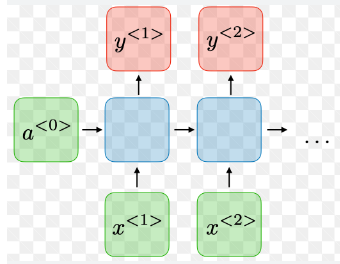

In [ ]:
import torch
import torch.nn as nn
#Как это работает? Каждый входной вектор признаков X имеет 512 признаков. После 
#ячейки  LSTM вектор признаков будет равен 100. Ячейка будет активироваться 49 раз
layer = nn.LSTM(input_size = 512, hidden_size = 100,
                            batch_first = True, bidirectional=False)
x = torch.randn(8, 49, 512)
y, _ = layer(x)
print(y.shape)

Как можно использовтаь для классификации действий на видео:
  1. Создать карту признаков с помощью сверточной нейронной сети, на выходе сети
карта признаков имеет размерность [bs, 512, H, W] ,
  2. Преобразуйте ее в [bs, H*W,512]
  3. Подавайте в ячейку LSTM
  4. C Выход LSTM развернуть (например через view) и подавать в полносвязную сеть. Также можно поставить hidden_size = 1. 

In [ ]:
# Если нужно использовать bidirectional
class RNN(nn.Module):
    def __init__(self, n_classes, lstm_in = 512, hidden_dim = 512,
                 bidirectional = None):
        super().__init__()
        self.cell = nn.LSTM(input_size = lstm_in, hidden_size = hidden_dim,
                            batch_first = True, bidirectional=bidirectional)
        if bidirectional:
            hidden_dim = 2 * hidden_dim
        self.emb = nn.Linear(hidden_dim, n_classes)

    def forward(self, x):
        output, _ = self.cell(x)
        output = self.emb(output)
        return output

lstm = RNN(512, 512, 512, True)
x = torch.randn(8, 49, 512)
y = lstm(x)
print(y.shape)

In [ ]:
import math
from functools import partial

import torch
import torch.nn as nn
import torch.nn.functional as F


def get_inplanes():
    return [64, 128, 256, 512]


def conv3x3x3(in_planes, out_planes, stride=1):
    return nn.Conv3d(in_planes,
                     out_planes,
                     kernel_size=3,
                     stride=stride,
                     padding=1,
                     bias=False)


def conv1x1x1(in_planes, out_planes, stride=1):
    return nn.Conv3d(in_planes,
                     out_planes,
                     kernel_size=1,
                     stride=stride,
                     bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, downsample=None):
        super().__init__()

        self.conv1 = conv3x3x3(in_planes, planes, stride)
        self.bn1 = nn.BatchNorm3d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3x3(planes, planes)
        self.bn2 = nn.BatchNorm3d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1, downsample=None):
        super().__init__()

        self.conv1 = conv1x1x1(in_planes, planes)
        self.bn1 = nn.BatchNorm3d(planes)
        self.conv2 = conv3x3x3(planes, planes, stride)
        self.bn2 = nn.BatchNorm3d(planes)
        self.conv3 = conv1x1x1(planes, planes * self.expansion)
        self.bn3 = nn.BatchNorm3d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    def __init__(self,
                 block,
                 layers,
                 block_inplanes,
                 n_input_channels=3,
                 conv1_t_size=7,
                 conv1_t_stride=1,
                 no_max_pool=False,
                 shortcut_type='B',
                 widen_factor=1.0,
                 n_classes=400):
        super().__init__()

        block_inplanes = [int(x * widen_factor) for x in block_inplanes]

        self.in_planes = block_inplanes[0]
        self.no_max_pool = no_max_pool

        self.conv1 = nn.Conv3d(n_input_channels,
                               self.in_planes,
                               kernel_size=(conv1_t_size, 7, 7),
                               stride=(conv1_t_stride, 2, 2),
                               padding=(conv1_t_size // 2, 3, 3),
                               bias=False)
        self.bn1 = nn.BatchNorm3d(self.in_planes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool3d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, block_inplanes[0], layers[0],
                                       shortcut_type)
        self.layer2 = self._make_layer(block,
                                       block_inplanes[1],
                                       layers[1],
                                       shortcut_type,
                                       stride=2)
        self.layer3 = self._make_layer(block,
                                       block_inplanes[2],
                                       layers[2],
                                       shortcut_type,
                                       stride=2)
        self.layer4 = self._make_layer(block,
                                       block_inplanes[3],
                                       layers[3],
                                       shortcut_type,
                                       stride=2)

        self.avgpool = nn.AdaptiveAvgPool3d((1, 1, 1))
        self.fc = nn.Linear(block_inplanes[3] * block.expansion, n_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv3d):
                nn.init.kaiming_normal_(m.weight,
                                        mode='fan_out',
                                        nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm3d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def _downsample_basic_block(self, x, planes, stride):
        out = F.avg_pool3d(x, kernel_size=1, stride=stride)
        zero_pads = torch.zeros(out.size(0), planes - out.size(1), out.size(2),
                                out.size(3), out.size(4))
        if isinstance(out.data, torch.cuda.FloatTensor):
            zero_pads = zero_pads.cuda()

        out = torch.cat([out.data, zero_pads], dim=1)

        return out

    def _make_layer(self, block, planes, blocks, shortcut_type, stride=1):
        downsample = None
        if stride != 1 or self.in_planes != planes * block.expansion:
            if shortcut_type == 'A':
                downsample = partial(self._downsample_basic_block,
                                     planes=planes * block.expansion,
                                     stride=stride)
            else:
                downsample = nn.Sequential(
                    conv1x1x1(self.in_planes, planes * block.expansion, stride),
                    nn.BatchNorm3d(planes * block.expansion))

        layers = []
        layers.append(
            block(in_planes=self.in_planes,
                  planes=planes,
                  stride=stride,
                  downsample=downsample))
        self.in_planes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.in_planes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        if not self.no_max_pool:
            x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)

        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x


def generate_model(model_depth, **kwargs):
    assert model_depth in [10, 18, 34, 50, 101, 152, 200]

    if model_depth == 10:
        model = ResNet(BasicBlock, [1, 1, 1, 1], get_inplanes(), **kwargs)
    elif model_depth == 18:
        model = ResNet(BasicBlock, [2, 2, 2, 2], get_inplanes(), **kwargs)
    elif model_depth == 34:
        model = ResNet(BasicBlock, [3, 4, 6, 3], get_inplanes(), **kwargs)
    elif model_depth == 50:
        model = ResNet(Bottleneck, [3, 4, 6, 3], get_inplanes(), **kwargs)
    elif model_depth == 101:
        model = ResNet(Bottleneck, [3, 4, 23, 3], get_inplanes(), **kwargs)
    elif model_depth == 152:
        model = ResNet(Bottleneck, [3, 8, 36, 3], get_inplanes(), **kwargs)
    elif model_depth == 200:
        model = ResNet(Bottleneck, [3, 24, 36, 3], get_inplanes(), **kwargs)

    return model

In [ ]:
model = generate_model(18, n_classes = 10)
x = torch.randn(1, 3, 10, 224, 224)
model(x).shape

torch.Size([1, 10])